# Data Prepare

In [1]:
import requests
import zipfile
import io

!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

!kaggle datasets download --force mlg-ulb/creditcardfraud

from zipfile import ZipFile

with ZipFile("creditcardfraud.zip", 'r') as zip_ref:
    zip_ref.extractall("Credit_Card_extracted_data")

 99% 65.0M/66.0M [00:01<00:00, 44.6MB/s]
100% 66.0M/66.0M [00:01<00:00, 36.7MB/s]


In [2]:
import pandas as pd

cr_data = pd.read_csv('/content/Credit_Card_extracted_data/creditcard.csv')

In [3]:
cr_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Distribution

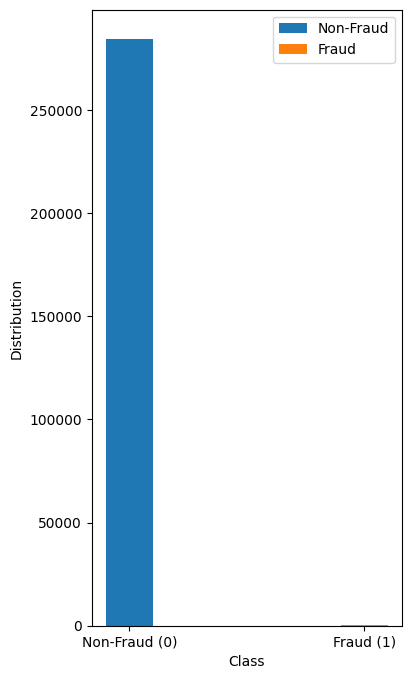

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(4, 8))
plt.hist(cr_data[cr_data['Class'] == 0]['Class'], bins=[-0.5, 0.5, 1.5],  label='Non-Fraud', alpha=1, rwidth=0.2)
plt.hist(cr_data[cr_data['Class'] == 1]['Class'], bins=[-0.5, 0.5, 1.5],  label='Fraud', alpha=1, rwidth=0.2)
plt.xlabel('Class')
plt.ylabel('Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.legend()
plt.show()

## Data Preprocess

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_credit_card_data(data_frame, split_size=0.4, seed=42):
    # Separate features (features) and target variable (target)
    features = data_frame.drop('Class', axis=1)
    target = data_frame['Class']

    # Splitting the dataset into training, validation, and test sets
    features_train, features_temp, target_train, target_temp = train_test_split(
        features, target, test_size=split_size, random_state=seed)
    features_val, features_test, target_val, target_test = train_test_split(
        features_temp, target_temp, test_size=0.5, random_state=seed)

    # Scaling the features
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_val_scaled = scaler.transform(features_val)
    features_test_scaled = scaler.transform(features_test)

    return features_train_scaled, features_val_scaled, features_test_scaled, target_train, target_val, target_test

X_train, X_valid, X_test, y_train, y_valid, y_test = preprocess_credit_card_data(cr_data, split_size=0.4, seed=42)

# Reshaping the data if needed
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Model
All based on the article

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense


# Assuming X_train is defined somewhere in your code
input_shape = X_train.shape[1]

# Build model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(input_shape, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 13, 64)            2

In [ ]:
history = model.fit(X_train, y_train, epochs=46, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/46
1336/1336 [==============================] - 30s 18ms/step - loss: 0.0420 - accuracy: 0.9956 - val_loss: 0.0163 - val_accuracy: 0.9992
Epoch 2/46
1336/1336 [==============================] - 23s 17ms/step - loss: 0.0132 - accuracy: 0.9984 - val_loss: 0.0130 - val_accuracy: 0.9991
Epoch 3/46
1336/1336 [==============================] - 22s 16ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0082 - val_accuracy: 0.9991
Epoch 4/46
1336/1336 [==============================] - 22s 16ms/step - loss: 0.0082 - accuracy: 0.9988 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 5/46
1336/1336 [==============================] - 22s 17ms/step - loss: 0.0076 - accuracy: 0.9989 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 6/46
1336/1336 [==============================] - 20s 15ms/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0057 - val_accuracy: 0.9992
Epoch 7/46
1336/1336 [==============================] - 23s 17ms/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0049 -

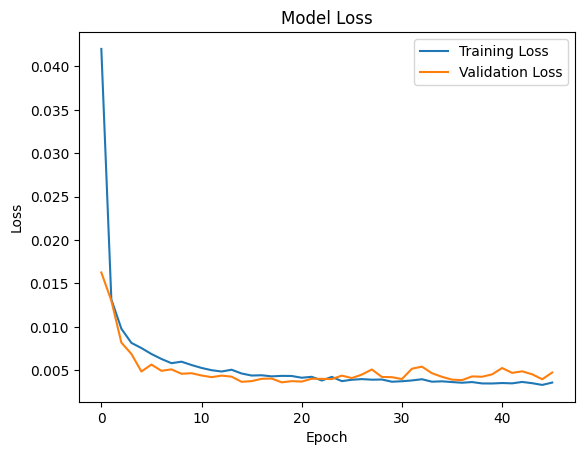

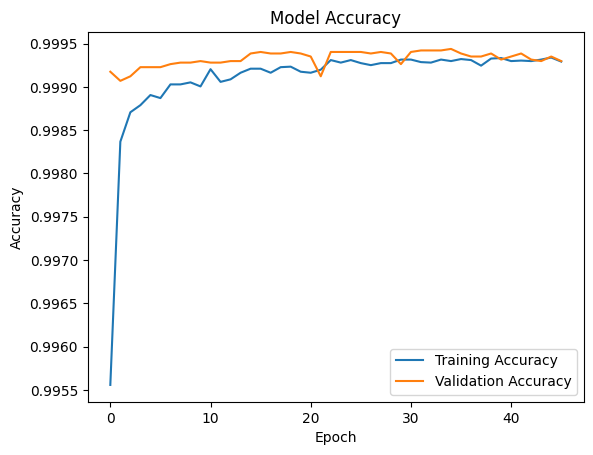

1781/1781 [==============================] - 5s 3ms/step - loss: 0.0046 - accuracy: 0.9994
Test loss: 0.004573842044919729
Test accuracy: 0.9993855357170105


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
import numpy as np
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(X_test)
y_pred_classes = np.squeeze(np.round(y_pred))
y_test_classes= y_test

Test AUC: 0.9138114440337035
Test Recall: 0.999385555282469
Test F1-score: 0.999385555282469
Test Precision: 0.999385555282469
Confusion Matrix (in %):


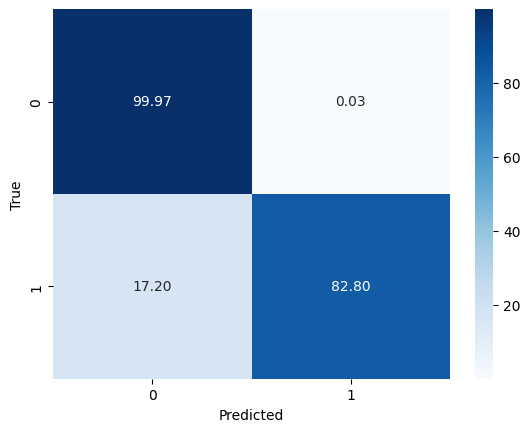

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
auc_score = roc_auc_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

cm = confusion_matrix(y_test_classes, y_pred_classes)
# Convert confusion matrix to percentage format
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percentage *= 100

# Display the confusion matrix in percentage format
print("Confusion Matrix (in %):")
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Using resampling method

In [ ]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Separate features and target variable
feature_data = cr_data.drop('Class', axis=1)
target_data = cr_data['Class']

# Initialize ADASYN and fit_transform the entire dataset
adasyn_sampler = ADASYN(sampling_strategy='minority', random_state=42)
features_resampled, target_resampled = adasyn_sampler.fit_resample(feature_data, target_data)

# Create a DataFrame for the resampled data
resampled_cr_data = pd.DataFrame(data=features_resampled, columns=feature_data.columns)
resampled_cr_data['Class'] = target_resampled

# Check the balance of classes in the resampled DataFrame
print(resampled_cr_data['Class'].value_counts())


0    284315
1    284298
Name: Class, dtype: int64


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample

# Separate features and target variable
feature_data = cr_data.drop('Class', axis=1)
target_data = cr_data['Class']

def nearest_neighbors(nbrs, instances, labels, n_neighbors=5):
    distances, indices = nbrs.kneighbors(instances, n_neighbors=n_neighbors)
    neighbors = instances[indices]
    distances = distances.flatten()
    labels = labels[indices]
    return distances, neighbors, labels

def under_sampling(neighbors, target):
    new_target = []
    new_neighbors = []
    for i in range(len(neighbors)):
        target_i = target[i]
        count_minority = 0
        for j in range(len(neighbors[i])):
            if target_i == target[i][j]:
                count_minority += 1
        if count_minority == 1:
            new_target.append(target_i)
            new_neighbors.append(neighbors[i])
    return new_neighbors, new_target

def over_sampling(neighbors, target, resample_ratio):
    new_neighbors = []
    new_target = []
    for i in range(len(neighbors)):
        target_i = target[i]
        count_majority = 0
        for j in range(len(neighbors[i])):
            if target_i == target[i][j]:
                count_majority += 1
        if count_majority > 1:
            resampled_points = resample(neighbors[i], replace=True, n_samples=int(count_majority*resample_ratio), random_state=42)
            for point in resampled_points:
                new_neighbors.append(point)
                new_target.append(target_i)
    return new_neighbors, new_target

def manual_adasyn(feature_data, target_data, sampling_strategy='minority', random_state=42):
    if sampling_strategy == 'minority':
        majority_class = np.bincount(target_data).argmax()
        minority_class = np.bincount(target_data).argmin()
        sampling_strategy = {majority_class: 1, minority_class: 1}
    resample_ratio = 1.0 / sum(sampling_strategy.values())

    nbrs = NearestNeighbors(n_neighbors=sampling_strategy[minority_class]+1).fit(feature_data)
    distances, neighbors, labels = nearest_neighbors(nbrs, feature_data, target_data)

    under_sampled_neighbors, under_sampled_target = under_sampling(neighbors, labels)
    over_sampled_neighbors, over_sampled_target = over_sampling(under_sampled_neighbors, under_sampled_target, resample_ratio)

    resampled_target = resample(over_sampled_target, replace=True, n_samples=sampling_strategy[majority_class], random_state=random_state)
    resampled_neighbors = [point for i in range(len(resampled_target)) for point in over_sampled_neighbors[i]]
    resampled_features = [point for i in range(len(resampled_target)) for point in under_sampled_neighbors[i]]

    return resampled_features, resampled_target

# Testing the manual_adasyn function
resampled_features, resampled_target = manual_adasyn(feature_data, target_data)

## New Data Distribution

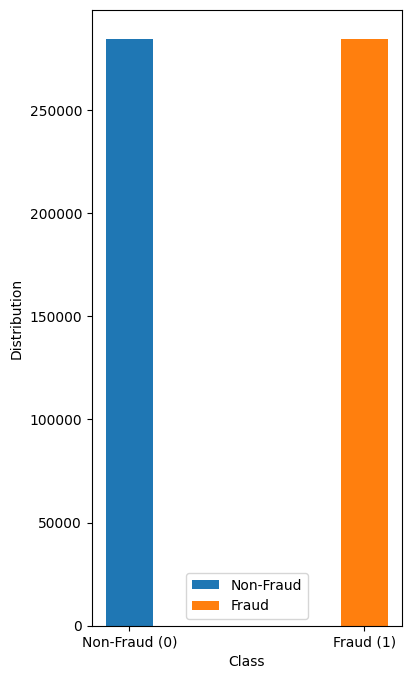

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
plt.hist(resampled_cr_data[resampled_cr_data['Class'] == 0]['Class'], bins=[-0.5, 0.5, 1.5],  label='Non-Fraud', alpha=1, rwidth=0.2)
plt.hist(resampled_cr_data[resampled_cr_data['Class'] == 1]['Class'], bins=[-0.5, 0.5, 1.5],  label='Fraud', alpha=1, rwidth=0.2)
plt.xlabel('Class')
plt.ylabel('Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.legend()
plt.show()

In [ ]:
X_train_res, X_valid_res, X_test_res, y_train_res, y_valid_res, y_test_res = preprocess_credit_card_data(resampled_cr_data, split_size=0.4, seed=42)

X_train_res = X_train_res.reshape(X_train_res.shape[0],X_train_res.shape[1],1)
X_valid_res = X_valid_res.reshape(X_valid_res.shape[0],X_valid_res.shape[1],1)
X_test_res = X_test_res.reshape(X_test_res.shape[0],X_test_res.shape[1],1)

# Training with resampled data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense


# Assuming X_train is defined somewhere in your code
input_shape = X_train.shape[1]

# Build model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(input_shape, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 14, 32)            0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_5 (Bat  (None, 13, 64)           

In [ ]:
history = model.fit(X_train_res, y_train_res, epochs=40, batch_size=128, validation_data=(X_valid_res, y_valid_res))

Epoch 1/40
2666/2666 [==============================] - 55s 20ms/step - loss: 0.1926 - accuracy: 0.9277 - val_loss: 0.0815 - val_accuracy: 0.9703
Epoch 2/40
2666/2666 [==============================] - 50s 19ms/step - loss: 0.1014 - accuracy: 0.9655 - val_loss: 0.0635 - val_accuracy: 0.9771
Epoch 3/40
2666/2666 [==============================] - 48s 18ms/step - loss: 0.0825 - accuracy: 0.9714 - val_loss: 0.0520 - val_accuracy: 0.9823
Epoch 4/40
2666/2666 [==============================] - 51s 19ms/step - loss: 0.0738 - accuracy: 0.9746 - val_loss: 0.0455 - val_accuracy: 0.9854
Epoch 5/40
2666/2666 [==============================] - 48s 18ms/step - loss: 0.0666 - accuracy: 0.9767 - val_loss: 0.0396 - val_accuracy: 0.9879
Epoch 6/40
2666/2666 [==============================] - 50s 19ms/step - loss: 0.0614 - accuracy: 0.9787 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 7/40
2666/2666 [==============================] - 49s 19ms/step - loss: 0.0578 - accuracy: 0.9799 - val_loss: 0.0342 -

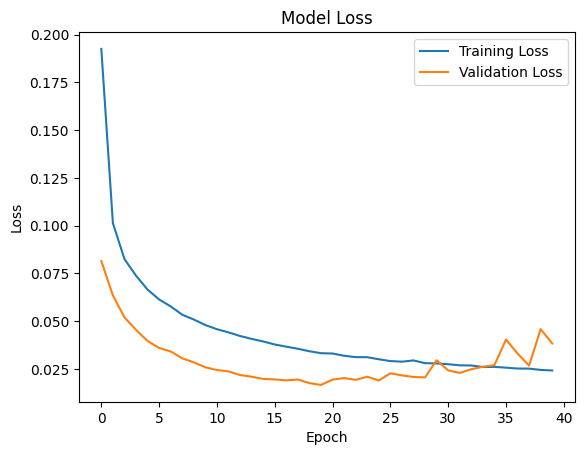

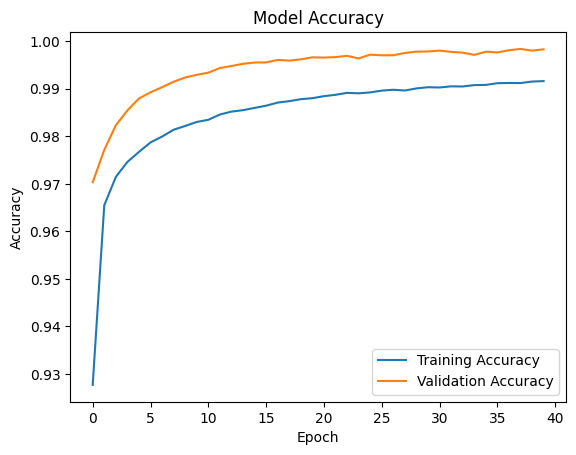

3554/3554 [==============================] - 11s 3ms/step - loss: 0.0381 - accuracy: 0.9982
Test loss: 0.03809763863682747
Test accuracy: 0.9981709718704224


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test_res, y_test_res, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
import numpy as np
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(X_test_res)
y_pred_classes = np.squeeze(np.round(y_pred))
y_test_classes= y_test_res

3554/3554 [==============================] - 7s 2ms/step


Test AUC: 0.9975535687648053
Test Recall: 0.997546670418473
Test F1-score: 0.997546670418473
Test Precision: 0.997546670418473
Confusion Matrix (in %):


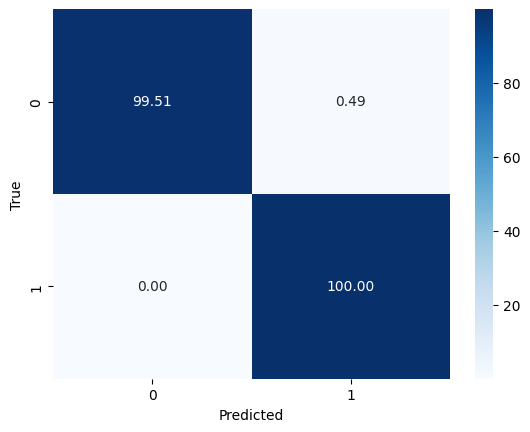

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
auc_score = roc_auc_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

cm = confusion_matrix(y_test_classes, y_pred_classes)
# Convert confusion matrix to percentage format
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percentage *= 100

# Display the confusion matrix in percentage format
print("Confusion Matrix (in %):")
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()